## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [2]:
model_dir = '/home/drevital/cs_video_processor/models/rgb_6'
im_dir = '/home/drevital/cs_video_processor/debug_images/rgb_6/classified_no_obstacle'
im_name = '1_367_.02_2021-11-14--09-45-42_.jpg'
im_height = 200
im_width = 400

## Load Trained Model

In [3]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [4]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2RGB)  

## Display Images

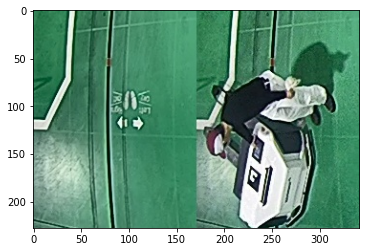

In [5]:
plt.imshow(im)
plt.show() 

## Prepare Images for Prediction

In [6]:
imrgb = cv2.resize(im,
                   dsize=(im_width, im_height),
                   interpolation=cv2.INTER_LINEAR)
imarr = np.array(imrgb, dtype='float32')
w = imarr.shape[1]

im1 = imarr[:,:w//2]
im2 = imarr[:,w//2:]
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

# Translate original rabge (0-255) to trained range (0.0-1.0)
im1 /= 255.0
im2 /= 255.0

# Reshape to match model's input shape
im1 = im1.reshape(1, im1.shape[0], im1.shape[1], 3)
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], 3)

## Predict 

In [7]:
prediction = model.predict([im1, im2])

In [8]:
prediction

array([[0.9996219]], dtype=float32)